# 4.9. Data visualization, part 2
#

# List of contents:
## 1. Import libraries
## 2. Import 'orders_products_customers_merged' dataset
## 3. Create charts:
### 3.1. Bar chart for 'order_day_of_week'
### 3.2. Histogram and scatterplot for 'prices'
### 3.3. Line chart for 'order_day_of_week' and 'prices' using sample data
### 3.4. Histogram for 'order_hour_of_day'
### 3.5. Bar charts for  'loyalty_flag' column
### 3.6. Line chart for 'prices' (avg and sum) and 'order_hour_of_day'
### 3.7. Line chart to evaluate the connection between age and number of dependants
### 3.8. Scatterplot to determine relationship between 'age' and 'income' columns 
### 3.9. Bar chart for 'order_hour_of_day'
## 4. Export all charts
#

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
# Function to display 500 rows
pd.set_option('display.max_rows',500)

## 2. Import 'orders_products_customers_merged' dataset

In [3]:
# Create path variable
path = r'C:\Users\marta\OneDrive\Documents\2023-09-18 Instacart Basket Analysis'

In [4]:
# Import orders_products_customers_merged dataset
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
# Check the dimensions
ords_prods_customers.shape

(32399732, 32)

In [6]:
# Check first rows
ords_prods_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 3. Create charts:

### 3.1. Bar chart for 'order_day_of_week'

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tue'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thu'),
  Text(6, 0, 'Fri')])

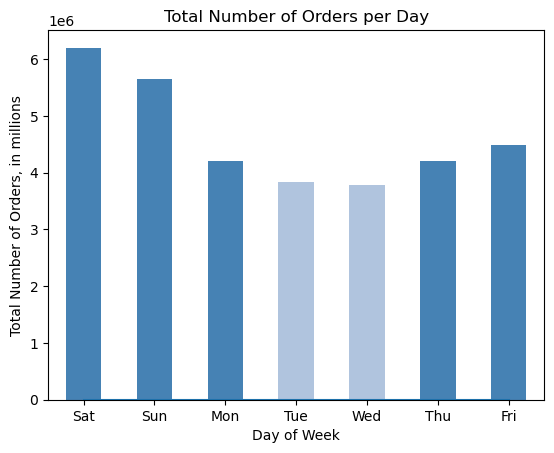

In [7]:
# Create a bar chart for 'order_day_of_week' column
bar_color = ['steelblue', 'steelblue', 'steelblue', 'lightsteelblue', 'lightsteelblue', 'steelblue', 'steelblue']
bar = ords_prods_customers['order_day_of_week'].value_counts().sort_index().plot.bar(color = bar_color)

x = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
default_x_ticks = range(len(x))
plt.plot(default_x_ticks)
plt.xticks(default_x_ticks, x)

plt.xlabel('Day of Week')
plt.ylabel('Total Number of Orders, in millions')
plt.title('Total Number of Orders per Day')

plt.xticks(rotation = 360)

In [8]:
# Create frequency of values for 'order_day_of_week' and sort by day
ords_prods_customers['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6203329
1    5659298
2    4213105
3    3839865
4    3783172
5    4205076
6    4495887
Name: count, dtype: int64

In [9]:
# Export the bar chart for 'order_day_of_week'
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'),bbox_inches='tight')

### 3.2.  Histogram and scatterplot for 'prices'

In [10]:
# Descriptive statistics for 'prices' column
ords_prods_customers['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

Text(0.5, 1.0, 'Distribution of Prices')

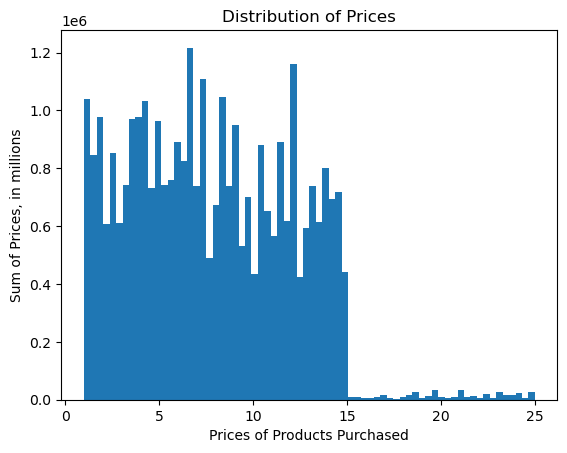

In [11]:
# Create histogram for 'prices' column
hist = ords_prods_customers['prices'].plot.hist(bins = 70)
plt.xlabel('Prices of Products Purchased')
plt.ylabel('Sum of Prices, in millions')
plt.title('Distribution of Prices')

<Axes: xlabel='prices', ylabel='prices'>

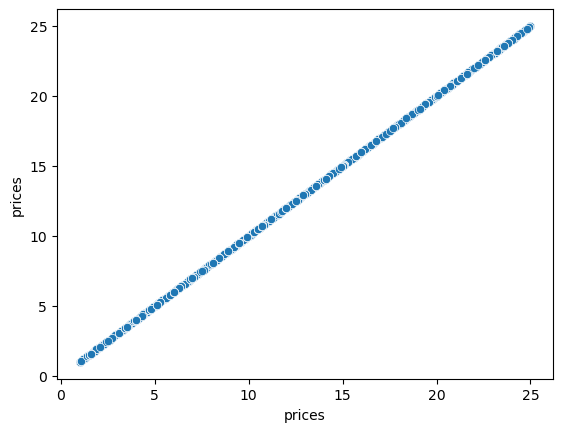

In [12]:
# Create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_customers)

In [13]:
# Export the histogram for 'prices' column
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'),bbox_inches='tight')

### 3.3. Line chart for 'order_day_of_week' and 'prices' using sample data

### -- Create sample dataframe

In [14]:
# Create a list with boolean values to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers)) <= 0.7

In [15]:
# Check the output
dev

array([False,  True, False, ..., False,  True,  True])

In [16]:
# Store 70% of data in df big
big = ords_prods_customers[dev]

In [17]:
# Store 30% of the data in df small
small = ords_prods_customers[~dev]

In [18]:
# Check the length of the entire dataframe
len(ords_prods_customers)

32399732

In [19]:
# Check the length of small sample df
len(small)

9719609

In [20]:
# Check the length of big samle df
len(big)

22680123

### -- Create a line chart for 'order_day_of_week' and 'prices'

In [21]:
# Create a dataframe with specific columns only
df_2 = small[['order_day_of_week','prices']]

C:\Users\marta\AppData\Local\Temp\ipykernel_4836\2858446433.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  line.set_xticklabels(['None','Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])


[Text(-1.0, 0, 'None'),
 Text(0.0, 0, 'Sat'),
 Text(1.0, 0, 'Sun'),
 Text(2.0, 0, 'Mon'),
 Text(3.0, 0, 'Tue'),
 Text(4.0, 0, 'Wed'),
 Text(5.0, 0, 'Thu'),
 Text(6.0, 0, 'Fri'),
 Text(7.0, 0, '')]

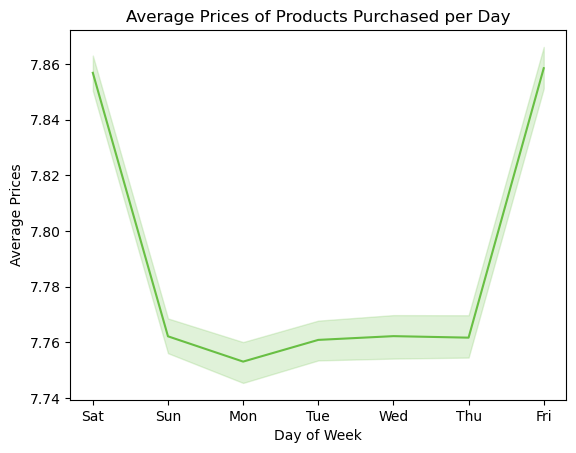

In [22]:
# Create a line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices', color='#68bf43')

plt.xlabel('Day of Week')
plt.ylabel('Average Prices')
plt.title('Average Prices of Products Purchased per Day')

line.set_xticklabels(['None','Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])


In [23]:
# Export the line chart for 'order_day_of_week'
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_order_dow.png'),bbox_inches='tight')

### 3.4. Histogram for 'order_hour_of_day'

(0.0, 24.150000000000002)

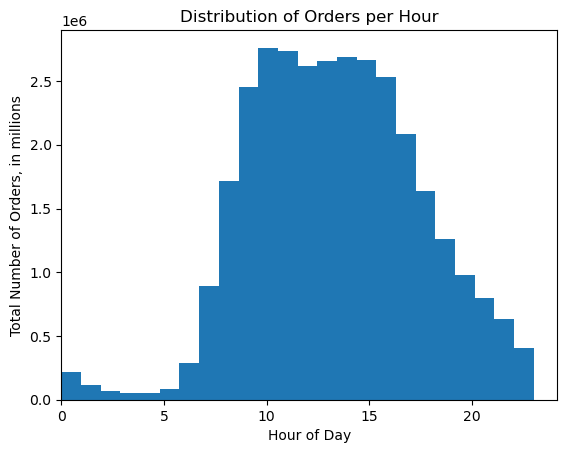

In [24]:
# Create histogram for 'order_hour_of_day' column
hist_order_time = ords_prods_customers['order_hour_of_day'].plot.hist(bins = 24)

plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Orders, in millions')
plt.title('Distribution of Orders per Hour')

ax = plt.gca()
ax.set_xlim([0, None])

### The histogram shows that the number of orders increases noticeably in the morning after 6 a.m. Peak hours are between 9 a.m. and 4 p.m. After that time, the number of orders goes down gradually. 

### 3.5. Bar charts for  'loyalty_flag' column

Text(0.5, 1.0, 'Total Number of Products Purchased by Customer Loyalty Group')

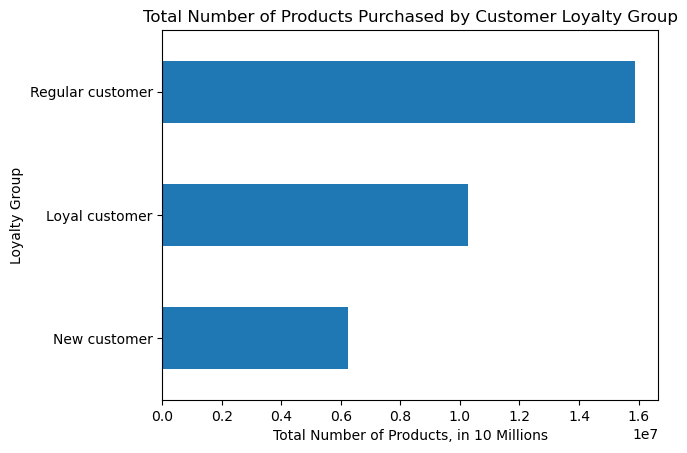

In [25]:
# Create a bar chart for 'loyalty_flag' column
bar_loyalty_flag = ords_prods_customers['loyalty_flag'].value_counts().sort_values().plot.barh()

plt.ylabel('Loyalty Group')
plt.xlabel('Total Number of Products, in 10 Millions')
plt.title('Total Number of Products Purchased by Customer Loyalty Group')

In [26]:
# Export bar_loyalty_flag chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_loyalty.png'),bbox_inches='tight')

In [27]:
# Group user_id (count and unique) by loyalty flag 
df_loyal_user_count = ords_prods_customers.groupby(['loyalty_flag'])['user_id'].agg(['count', 'nunique'])

In [28]:
# Check the output
df_loyal_user_count

,count,nunique
loyalty_flag,,
Loyal customer,10282763,17017
New customer,6242841,112328
Regular customer,15874128,76864


Text(0.5, 1.0, 'Total Number of Customers per Loyalty Group')

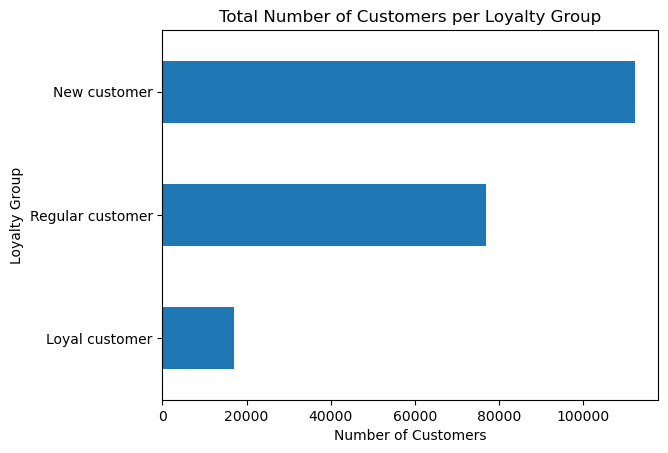

In [29]:
# Create bar chart for 'loyalty_flag' and count unique 'user_id'

bar_loyal_group_count = df_loyal_user_count['nunique'].sort_values().plot.barh()

plt.ylabel('Loyalty Group')
plt.xlabel('Number of Customers')
plt.title('Total Number of Customers per Loyalty Group')

In [30]:
# Export bar_loyal_group_count chart
bar_loyal_group_count.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_customers_count.png'),bbox_inches='tight')

### 3.6. Line charts for 'prices' (avg and sum) and 'order_hour_of_day'

### -- Avg prices and order_hour_of_day

In [31]:
# Create a dataframe with specified columns
df_prices_ords = small[['order_hour_of_day','prices']]

In [32]:
# Export dataframe in csv format
#df_prices_ords.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'prices_orders_time.csv'))

In [33]:
# Frequency distribution for 'order_hour_of_day'
df_prices_ords['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      65632
1      34990
2      20995
3      15606
4      15983
5      26391
6      87158
7     267462
8     515656
9     736758
10    828516
11    822700
12    785306
13    797131
14    807001
15    797527
16    759080
17    626284
18    490905
19    376452
20    292922
21    238842
22    190000
23    120312
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x26037b7cb50>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

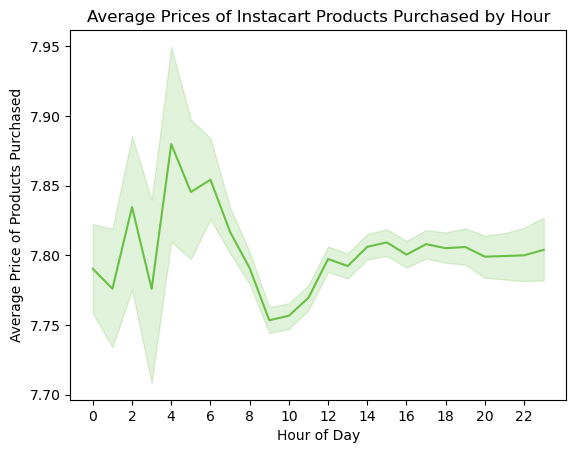

In [34]:
# Create a line chart for average prices of products bought during the day
line_prices_ords_time = sns.lineplot(data = df_prices_ords, x = 'order_hour_of_day',y = 'prices', color='#68bf43')

plt.xlabel('Hour of Day')
plt.ylabel('Average Price of Products Purchased')
plt.title('Average Prices of Instacart Products Purchased by Hour')

plt.xticks(np.arange(0, 23, step=2))

### The chart shows that average prices of products are the lowest at 9 a.m. and start raising only after 12 p.m. This suggests, that customers overall buy more products during this period of the day, but these products are cheaper. 

### -- Sum of prices for order_hour_of_day

In [35]:
# Group data by order_hour_of_day and sum prices for each group
df_prices_ords.groupby(['order_hour_of_day'])['prices'].sum()

order_hour_of_day
0      511296.4
1      272082.8
2      164487.6
3      121350.9
4      125943.1
5      207049.1
6      684561.7
7     2090708.0
8     4017365.0
9     5712392.2
10    6426493.1
11    6392006.6
12    6123314.3
13    6211498.2
14    6299528.9
15    6228098.6
16    5921189.3
17    4890046.5
18    3831568.8
19    2938569.6
20    2284499.3
21    1862847.6
22    1481998.4
23     938910.0
Name: prices, dtype: float64

([<matplotlib.axis.XTick at 0x260378cbe10>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

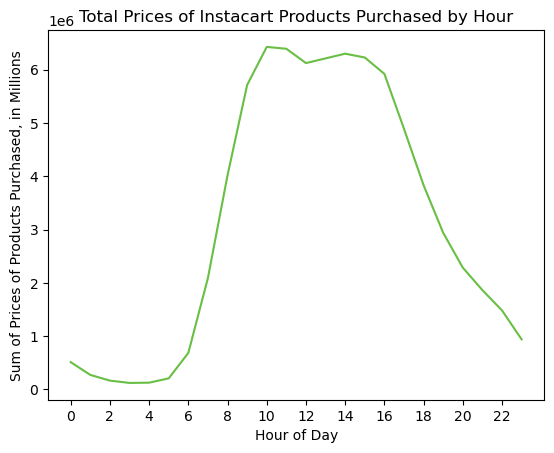

In [36]:
# Create line chart for the sum of prices per hour
data = df_prices_ords.groupby(['order_hour_of_day'], as_index=False)['prices'].sum()
line_sum_prices_time = sns.lineplot(data=data, x='order_hour_of_day', y='prices', color='#68bf43')
plt.xlabel('Hour of Day')
plt.ylabel('Sum of Prices of Products Purchased, in Millions')
plt.title('Total Prices of Instacart Products Purchased by Hour')

plt.xticks(np.arange(0, 23, step=2))

In [37]:
# Export chart in png format
line_sum_prices_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_sum_prices_time.png'),bbox_inches='tight')


### 3.7. Line chart to evaluate the connection between age and number of dependants

In [38]:
# Create a dataframe with specified columns
df_age_dependant = small[['age','n_dependants']]

Text(0.5, 1.0, 'Relationship between Customers Age and Number of Dependants')

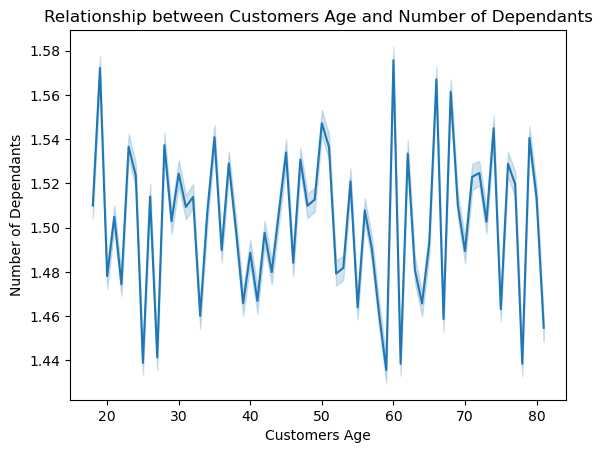

In [39]:
# Create a line chart using specified columns
line_age_dependant = sns.lineplot(data = df_age_dependant, x = 'age',y = 'n_dependants')

plt.xlabel('Customers Age')
plt.ylabel('Number of Dependants')
plt.title('Relationship between Customers Age and Number of Dependants')

### The line chart doesn't show any connection between the age and number of dependants.

### 3.8. Scatterplot to determine relationship between 'age' and 'income' columns 

Text(0.5, 1.0, 'Relationship between Customers Age and Income')

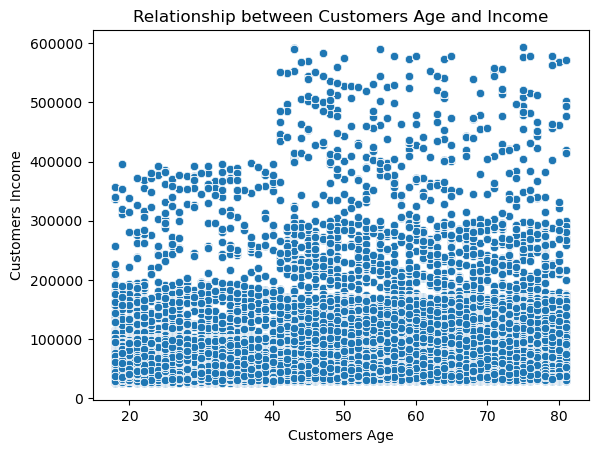

In [40]:
# Create a scatterplot for specified variables
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_customers)
plt.xlabel('Customers Age')
plt.ylabel('Customers Income')
plt.title('Relationship between Customers Age and Income')

### Only customers older than 40 years, fall within high-income category (from 400,000 to 600,000).

### 3.9. Bar chart for 'order_hour_of_day'

([<matplotlib.axis.XTick at 0x2603797c3d0>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

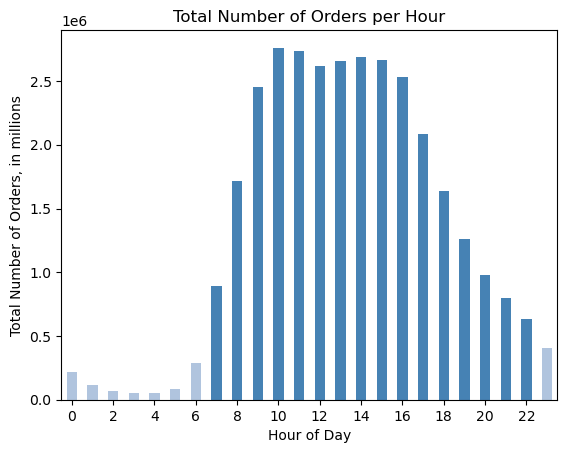

In [41]:
# Create a bar chart for 'order_hour_of_day' column
bar_color_2 = ['lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'lightsteelblue']
bar_hourly_ords = ords_prods_customers['order_hour_of_day'].value_counts().sort_index().plot.bar(color = bar_color_2)

plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Orders, in millions')
plt.title('Total Number of Orders per Hour')

plt.xticks(rotation = 360)
plt.xticks(np.arange(0, 23, step=2))

### 3.10. Bar chart for 'price_range_loc'

Text(0.5, 1.0, 'Total Number of Products Purchased per Price Range')

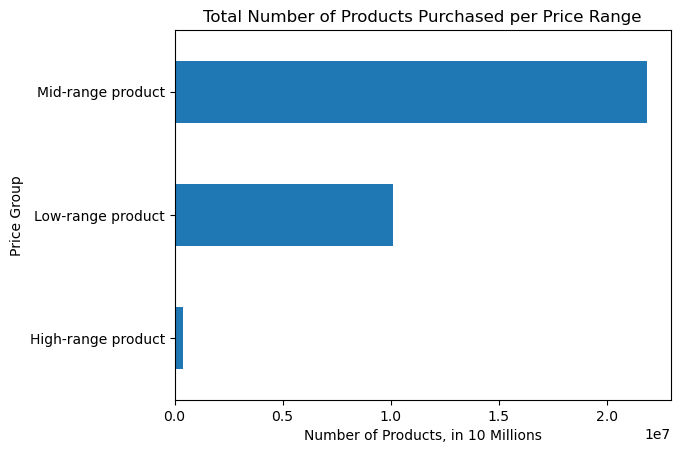

In [42]:
# Create bar chart for 'price_range_loc'
bar_price_group = ords_prods_customers['price_range_loc'].value_counts().sort_index().plot.barh()

plt.ylabel('Price Group')
plt.xlabel('Number of Products, in 10 Millions')
plt.title('Total Number of Products Purchased per Price Range')

## 4. Export all charts

In [43]:
# Export all charts in png format
hist_order_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_time.png'),bbox_inches='tight')
line_prices_ords_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_ords_time.png'),bbox_inches='tight')
line_age_dependant.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'),bbox_inches='tight')
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'),bbox_inches='tight')
bar_hourly_ords.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_hourly.png'),bbox_inches='tight')
bar_price_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_groups.png'),bbox_inches='tight')
